# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### DATASET EXPLORATION AND CLEANING

In [346]:
import numpy as np
import pandas as pd
import colorama
from colorama import Fore, Back, Style

#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)


train_dataset=pd.read_csv('train.csv',index_col=0)
test_dataset=pd.read_csv('test.csv',index_col=0)

In [347]:
#Visualize the first lines of the train dataset:
print(Fore.BLUE+'FIRST ROWS OF TITANIC TRAIN DATASET:\n')
display(train_dataset.head())

#Visualize information and statistics about the train dataset:
print(Fore.BLUE+'INFO SUMMARY FOR TITANIC TRAIN DATASET: \n'+Fore.RESET)
display(train_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR TITANIC TRAIN DATASET: \n')
display(train_dataset.describe())

FIRST ROWS OF TITANIC TRAIN DATASET:



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


INFO SUMMARY FOR TITANIC TRAIN DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

DESCRIPTIVE STATS FOR TITANIC TRAIN DATASET: 



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [348]:
#Visualize the first lines of the test dataset:
print(Fore.BLUE+'FIRST ROWS OF TITANIC TEST DATASET:\n')
display(test_dataset.head())

#Visualize information and statistics about the test dataset:
print(Fore.BLUE+'INFO SUMMARY FOR TITANIC TEST DATASET: \n'+Fore.RESET)
display(test_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR TITANIC TEST DATASET: \n')
display(test_dataset.describe())

FIRST ROWS OF TITANIC TEST DATASET:



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


INFO SUMMARY FOR TITANIC TEST DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


None

DESCRIPTIVE STATS FOR TITANIC TEST DATASET: 



,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [349]:
#check for duplicate
print(Fore.BLUE+'Duplicates for TRAIN DATASET: \n'+Fore.RESET,train_dataset.duplicated().sum())
print(Fore.BLUE+'Duplicates for TEST DATASET: \n'+Fore.RESET,test_dataset.duplicated().sum())

Duplicates for TRAIN DATASET: 
 0
Duplicates for TEST DATASET: 
 0


In [350]:
#Check NA values:
print(Fore.BLUE+'% NA values for TRAIN DATASET: \n'+Fore.RESET,train_dataset.isna().sum()*100/len(train_dataset))
print(Fore.BLUE+'% NA values for TEST DATASET: \n'+Fore.RESET,test_dataset.isna().sum()*100/len(test_dataset))

% NA values for TRAIN DATASET: 
 Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64
% NA values for TEST DATASET: 
 Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64


In [351]:
print(Fore.BLUE+'% NA values for TRAIN DATASET: \n'+Fore.RESET,train_dataset.isna().sum())
print(Fore.BLUE+'% NA values for TEST DATASET: \n'+Fore.RESET,test_dataset.isna().sum())

% NA values for TRAIN DATASET: 
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
% NA values for TEST DATASET: 
 Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [352]:
#Lots of missing values in the columns Age and Cabin. 
#too many missing values in Cabin: let's drop it. Let's replace missing values of the variable Age
train_dataset.drop(['Cabin','Name','Ticket'], inplace=True, axis=1)
test_dataset.drop(['Cabin','Name','Ticket'], inplace=True, axis=1)

train_dataset['Age'].fillna(train_dataset['Age'].median(),inplace=True)
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0],inplace=True)
test_dataset['Age'].fillna(test_dataset['Age'].median(),inplace=True)
test_dataset['Fare'].fillna(test_dataset['Fare'].median(),inplace=True)


#### DATA VISUALISATION

In [353]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [354]:
feats_cat=list(train_dataset.select_dtypes(include='object'))

for feats in train_dataset[feats_cat]:
    print(train_dataset[feats].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


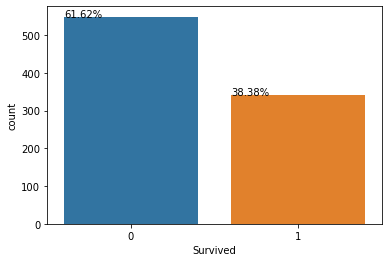

In [355]:




#fig,ax=plt.subplots(figsize=(5,5))

ax=sns.countplot(train_dataset['Survived'])
for p in ax.patches:
    percent = '{:.2f}%'.format(100 * p.get_height()/len(train_dataset))
    x = p.get_x()
    y = p.get_height()
    ax.text(x,y,percent)

#as expected dataset is imbalanced

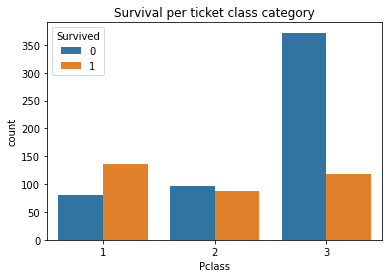

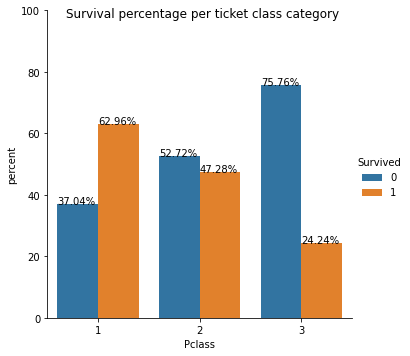

In [356]:

f=sns.countplot(x='Pclass',hue='Survived', data=train_dataset)
f.set_title('Survival per ticket class category')

x,y='Pclass','Survived'
df1 = train_dataset.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.fig.suptitle('Survival percentage per ticket class category')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


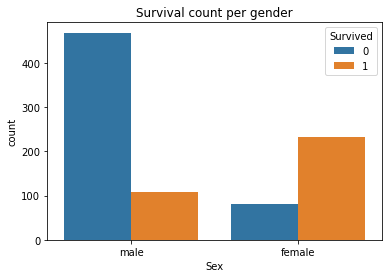

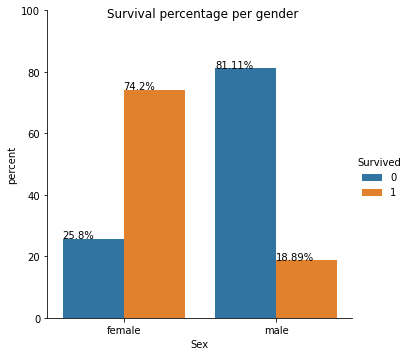

In [357]:



f=sns.countplot(x='Sex',data=train_dataset, hue='Survived')
f.set_title('Survival count per gender')
x,y='Sex','Survived'
df2=train_dataset.groupby(x)[y].value_counts(normalize=True)
df2=df2.mul(100)
df2=df2.rename('percent').reset_index()

g=sns.catplot(x=x, y='percent', hue=y,kind='bar', data=df2)
g.ax.set_ylim(0,100)
g.fig.suptitle('Survival percentage per gender')
for p in g.ax.patches:
    txt=str(p.get_height().round(2))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

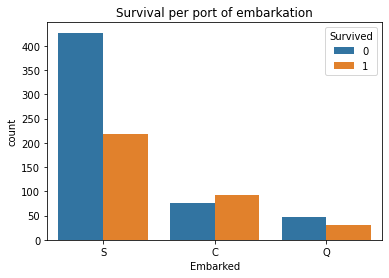

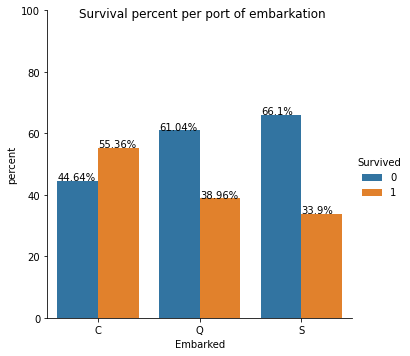

In [358]:
f=sns.countplot(x='Embarked',hue='Survived',data=train_dataset)
f.set_title('Survival per port of embarkation')

x,y='Embarked','Survived'
df3=train_dataset.groupby(x)[y].value_counts(normalize=True)
df3=df3.mul(100)
df3=df3.rename('percent').reset_index()


g=sns.catplot(x=x, y='percent', hue=y,kind='bar', data=df3)
g.fig.suptitle('Survival percent per port of embarkation')
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x,txt_y,txt)
 
    

,SibSp,Survived,percent
0,0,0,65.46
1,0,1,34.54
2,1,1,53.59
3,1,0,46.41
4,2,0,53.57
5,2,1,46.43
6,3,0,75.00
7,3,1,25.00
8,4,0,83.33
9,4,1,16.67


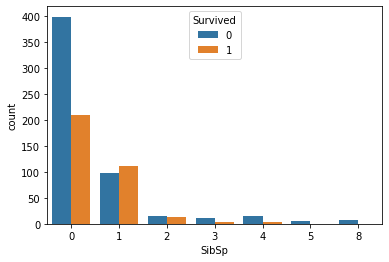

In [359]:
f=sns.countplot(x='SibSp', hue='Survived', data=train_dataset)
x,y='SibSp','Survived'
df4=train_dataset.groupby(x)[y].value_counts(normalize=True)
df4=df4.mul(100).round(2)
df4.rename('percent').reset_index()



<AxesSubplot:xlabel='Survived', ylabel='Age'>

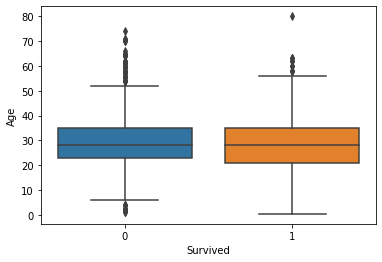

In [360]:
sns.boxplot(x='Survived',y='Age',data=train_dataset)

In [361]:
#Create groups for the variable Age based on quantiles:
Age_classes = pd.cut(train_dataset['Age'], [0,20, 28,38,80],labels=[0,1,2,3])
train_dataset['Age_classes']= Age_classes
Age_classes_test = pd.cut(test_dataset['Age'], [0
                                                
                                                , 20,28,38,80],labels=[0,1,2,3])
test_dataset['Age_classes']= Age_classes_test

train_dataset.Age_classes=train_dataset.Age_classes.astype('int64')
test_dataset.Age_classes=test_dataset.Age_classes.astype('int64')

train_dataset.drop('Age', axis=1, inplace=True)
test_dataset.drop('Age', axis=1, inplace=True)

In [362]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Age_classes  418 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 26.1+ KB


<AxesSubplot:xlabel='Age_classes', ylabel='count'>

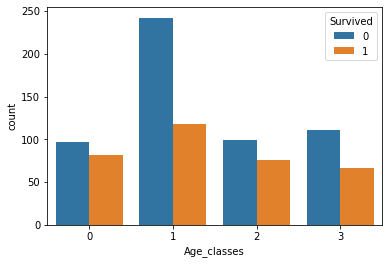

In [363]:
sns.countplot(x='Age_classes',data=train_dataset, hue='Survived')

In [364]:
train_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_classes
PassengerId,,,,,,,,
1,0,3,male,1,0,7.2500,S,1
2,1,1,female,1,0,71.2833,C,2
3,1,3,female,0,0,7.9250,S,1
4,1,1,female,1,0,53.1000,S,2
5,0,3,male,0,0,8.0500,S,2


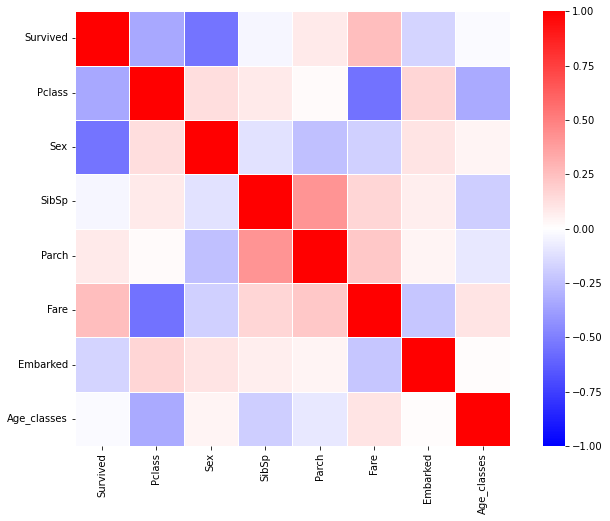

In [365]:
#Visualisation of correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(train_dataset.assign(Pclass = train_dataset.Pclass.astype('category').cat.codes,
                      Sex = train_dataset.Sex.astype('category').cat.codes,
                      Embarked = train_dataset.Embarked.astype('category').cat.codes).corr(),
                    
                      annot = False, cmap = 'bwr',vmin = -1, vmax = 1, square = True, linewidths = 0.5)
plt.show()


In [366]:
#Split features and target
y_train=train_dataset['Survived']
X_train=train_dataset.drop('Survived', axis=1)
X_test=test_dataset

In [367]:
#Features normalization
from sklearn.preprocessing import MinMaxScaler
Train_cat = list(X_train.select_dtypes(include='object'))
Train_num=list(X_train.select_dtypes(exclude='object'))
scaler=MinMaxScaler()
X_train[Train_num]= scaler.fit_transform(X_train[Train_num])
X_test[Train_num]=scaler.transform(X_test[Train_num])

#### CatBoost

In [368]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
Train_cat = list(X_train.select_dtypes(include='object'))
CBC =CatBoostClassifier(
    iterations=500,
    auto_class_weights='Balanced',
    random_seed=42,
    learning_rate=0.1,
    cat_features=Train_cat,
    eval_metric='F1'
)


CBC.fit(X_train, y_train)

0:	learn: 0.7502674	total: 19.7ms	remaining: 9.83s
1:	learn: 0.7600845	total: 35ms	remaining: 8.72s
2:	learn: 0.7633018	total: 51.8ms	remaining: 8.58s
3:	learn: 0.7497748	total: 58.6ms	remaining: 7.26s
4:	learn: 0.7450528	total: 65.4ms	remaining: 6.47s
5:	learn: 0.7450528	total: 88.2ms	remaining: 7.26s
6:	learn: 0.7450528	total: 95ms	remaining: 6.69s
7:	learn: 0.7450528	total: 113ms	remaining: 6.98s
8:	learn: 0.7625400	total: 132ms	remaining: 7.22s
9:	learn: 0.7648298	total: 152ms	remaining: 7.46s
10:	learn: 0.7655962	total: 172ms	remaining: 7.63s
11:	learn: 0.7789408	total: 190ms	remaining: 7.75s
12:	learn: 0.7793171	total: 209ms	remaining: 7.84s
13:	learn: 0.7800963	total: 231ms	remaining: 8s
14:	learn: 0.7808771	total: 250ms	remaining: 8.07s
15:	learn: 0.7851612	total: 269ms	remaining: 8.13s
16:	learn: 0.7886088	total: 296ms	remaining: 8.4s
17:	learn: 0.7851360	total: 309ms	remaining: 8.27s
18:	learn: 0.7866875	total: 328ms	remaining: 8.31s
19:	learn: 0.7909496	total: 348ms	remainin

167:	learn: 0.9054302	total: 3.34s	remaining: 6.59s
168:	learn: 0.9071188	total: 3.35s	remaining: 6.57s
169:	learn: 0.9071188	total: 3.37s	remaining: 6.55s
170:	learn: 0.9071188	total: 3.39s	remaining: 6.53s
171:	learn: 0.9071188	total: 3.41s	remaining: 6.51s
172:	learn: 0.9071188	total: 3.45s	remaining: 6.51s
173:	learn: 0.9079655	total: 3.46s	remaining: 6.49s
174:	learn: 0.9079655	total: 3.48s	remaining: 6.47s
175:	learn: 0.9088138	total: 3.5s	remaining: 6.45s
176:	learn: 0.9088138	total: 3.52s	remaining: 6.43s
177:	learn: 0.9088138	total: 3.54s	remaining: 6.41s
178:	learn: 0.9096636	total: 3.56s	remaining: 6.39s
179:	learn: 0.9096636	total: 3.58s	remaining: 6.37s
180:	learn: 0.9096636	total: 3.6s	remaining: 6.35s
181:	learn: 0.9096636	total: 3.65s	remaining: 6.38s
182:	learn: 0.9113681	total: 3.67s	remaining: 6.36s
183:	learn: 0.9105150	total: 3.69s	remaining: 6.34s
184:	learn: 0.9113681	total: 3.71s	remaining: 6.32s
185:	learn: 0.9121495	total: 3.73s	remaining: 6.3s
186:	learn: 0.9

332:	learn: 0.9417628	total: 6.73s	remaining: 3.38s
333:	learn: 0.9417628	total: 6.75s	remaining: 3.36s
334:	learn: 0.9417628	total: 6.77s	remaining: 3.33s
335:	learn: 0.9408893	total: 6.79s	remaining: 3.31s
336:	learn: 0.9408893	total: 6.81s	remaining: 3.29s
337:	learn: 0.9424637	total: 6.83s	remaining: 3.27s
338:	learn: 0.9408893	total: 6.85s	remaining: 3.25s
339:	learn: 0.9408893	total: 6.87s	remaining: 3.23s
340:	learn: 0.9424637	total: 6.88s	remaining: 3.21s
341:	learn: 0.9424637	total: 6.9s	remaining: 3.19s
342:	learn: 0.9424637	total: 6.92s	remaining: 3.17s
343:	learn: 0.9433373	total: 6.94s	remaining: 3.15s
344:	learn: 0.9417628	total: 6.96s	remaining: 3.13s
345:	learn: 0.9433373	total: 6.99s	remaining: 3.11s
346:	learn: 0.9433373	total: 7.01s	remaining: 3.09s
347:	learn: 0.9433373	total: 7.03s	remaining: 3.07s
348:	learn: 0.9433373	total: 7.04s	remaining: 3.05s
349:	learn: 0.9442125	total: 7.06s	remaining: 3.03s
350:	learn: 0.9442125	total: 7.08s	remaining: 3.01s
351:	learn: 0

495:	learn: 0.9537729	total: 10.1s	remaining: 81.7ms
496:	learn: 0.9537729	total: 10.1s	remaining: 61.3ms
497:	learn: 0.9537729	total: 10.2s	remaining: 40.8ms
498:	learn: 0.9537729	total: 10.2s	remaining: 20.4ms
499:	learn: 0.9537729	total: 10.2s	remaining: 0us


In [369]:
#Predictions and metrics
from sklearn.metrics import classification_report


CBC_pred_train=CBC.predict(X_train)
print(Fore.BLUE+"Testing performance"+Fore.RESET)
print ("CBC score:{:.2f} ".format(CBC.score(X_train, y_train)))
print(Fore.BLUE+"Classification report:\n"+Fore.RESET,classification_report(CBC_pred_train, y_train))

Testing performance
CBC score:0.92 
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       567
           1       0.87      0.92      0.89       324

    accuracy                           0.92       891
   macro avg       0.91      0.92      0.92       891
weighted avg       0.92      0.92      0.92       891



In [370]:
#Get features importance
CBC.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Fare,28.385616
1,Sex,23.718439
2,Age_classes,13.374114
3,Embarked,13.319670
4,Pclass,10.009998
5,SibSp,5.637117
6,Parch,5.555046


In [371]:
#Prediction on test_dataset
CBC_pred_test=CBC.predict(X_test)
submission_titanic_5 = pd.DataFrame({'PassengerId':X_test.index, 'Survived':CBC_pred_test})
submission_titanic_5.set_index('PassengerId',inplace=True)
submission_titanic_5.to_csv('submission_titanic_5.csv')

In [372]:
#drop features of least importance
X_train.drop(['Pclass','Parch','SibSp'], axis=1, inplace=True)
X_test.drop(['Pclass','Parch','SibSp'], axis=1, inplace=True)

Train_cat = list(X_train.select_dtypes(include='object'))
CBC =CatBoostClassifier(
    iterations=500,
    auto_class_weights='Balanced',
    random_seed=42,
    learning_rate=0.1,
    cat_features=Train_cat,
    eval_metric='F1'
)


CBC.fit(X_train, y_train)

0:	learn: 0.7549621	total: 19.1ms	remaining: 9.55s
1:	learn: 0.7450528	total: 35.3ms	remaining: 8.78s
2:	learn: 0.7450528	total: 57.9ms	remaining: 9.6s
3:	learn: 0.7450528	total: 71.7ms	remaining: 8.89s
4:	learn: 0.7477997	total: 91.7ms	remaining: 9.08s
5:	learn: 0.7470561	total: 102ms	remaining: 8.41s
6:	learn: 0.7450528	total: 109ms	remaining: 7.7s
7:	learn: 0.7450528	total: 120ms	remaining: 7.36s
8:	learn: 0.7450528	total: 142ms	remaining: 7.76s
9:	learn: 0.7450528	total: 153ms	remaining: 7.52s
10:	learn: 0.7450528	total: 169ms	remaining: 7.49s
11:	learn: 0.7470561	total: 183ms	remaining: 7.43s
12:	learn: 0.7450528	total: 204ms	remaining: 7.63s
13:	learn: 0.7450528	total: 214ms	remaining: 7.43s
14:	learn: 0.7470561	total: 244ms	remaining: 7.88s
15:	learn: 0.7483100	total: 264ms	remaining: 7.99s
16:	learn: 0.7475685	total: 284ms	remaining: 8.05s
17:	learn: 0.7495574	total: 305ms	remaining: 8.16s
18:	learn: 0.7515400	total: 325ms	remaining: 8.22s
19:	learn: 0.7515400	total: 333ms	rema

161:	learn: 0.8839726	total: 3.23s	remaining: 6.74s
162:	learn: 0.8823259	total: 3.27s	remaining: 6.75s
163:	learn: 0.8823259	total: 3.29s	remaining: 6.73s
164:	learn: 0.8823259	total: 3.31s	remaining: 6.71s
165:	learn: 0.8847846	total: 3.33s	remaining: 6.7s
166:	learn: 0.8839726	total: 3.35s	remaining: 6.68s
167:	learn: 0.8864267	total: 3.38s	remaining: 6.67s
168:	learn: 0.8864267	total: 3.4s	remaining: 6.67s
169:	learn: 0.8864267	total: 3.43s	remaining: 6.65s
170:	learn: 0.8855981	total: 3.45s	remaining: 6.64s
171:	learn: 0.8855981	total: 3.47s	remaining: 6.62s
172:	learn: 0.8872406	total: 3.49s	remaining: 6.6s
173:	learn: 0.8872406	total: 3.51s	remaining: 6.58s
174:	learn: 0.8880559	total: 3.54s	remaining: 6.57s
175:	learn: 0.8880559	total: 3.56s	remaining: 6.55s
176:	learn: 0.8880559	total: 3.61s	remaining: 6.58s
177:	learn: 0.8888728	total: 3.63s	remaining: 6.56s
178:	learn: 0.8888728	total: 3.65s	remaining: 6.54s
179:	learn: 0.8888728	total: 3.67s	remaining: 6.53s
180:	learn: 0.8

322:	learn: 0.9298106	total: 6.56s	remaining: 3.6s
323:	learn: 0.9298106	total: 6.58s	remaining: 3.58s
324:	learn: 0.9298106	total: 6.6s	remaining: 3.56s
325:	learn: 0.9298106	total: 6.62s	remaining: 3.54s
326:	learn: 0.9298106	total: 6.64s	remaining: 3.52s
327:	learn: 0.9298106	total: 6.67s	remaining: 3.5s
328:	learn: 0.9298106	total: 6.69s	remaining: 3.48s
329:	learn: 0.9298106	total: 6.71s	remaining: 3.46s
330:	learn: 0.9298106	total: 6.73s	remaining: 3.44s
331:	learn: 0.9289565	total: 6.75s	remaining: 3.42s
332:	learn: 0.9289565	total: 6.77s	remaining: 3.4s
333:	learn: 0.9289565	total: 6.79s	remaining: 3.38s
334:	learn: 0.9289565	total: 6.82s	remaining: 3.36s
335:	learn: 0.9289565	total: 6.84s	remaining: 3.34s
336:	learn: 0.9298106	total: 6.86s	remaining: 3.32s
337:	learn: 0.9298106	total: 6.88s	remaining: 3.3s
338:	learn: 0.9298106	total: 6.9s	remaining: 3.27s
339:	learn: 0.9298106	total: 6.92s	remaining: 3.25s
340:	learn: 0.9298106	total: 6.93s	remaining: 3.23s
341:	learn: 0.9298

482:	learn: 0.9474646	total: 9.77s	remaining: 344ms
483:	learn: 0.9474646	total: 9.79s	remaining: 324ms
484:	learn: 0.9491991	total: 9.82s	remaining: 304ms
485:	learn: 0.9491991	total: 9.84s	remaining: 283ms
486:	learn: 0.9491991	total: 9.85s	remaining: 263ms
487:	learn: 0.9491991	total: 9.87s	remaining: 243ms
488:	learn: 0.9491991	total: 9.9s	remaining: 223ms
489:	learn: 0.9507408	total: 9.91s	remaining: 202ms
490:	learn: 0.9507408	total: 9.93s	remaining: 182ms
491:	learn: 0.9498726	total: 9.95s	remaining: 162ms
492:	learn: 0.9490060	total: 9.97s	remaining: 142ms
493:	learn: 0.9490060	total: 9.99s	remaining: 121ms
494:	learn: 0.9498726	total: 10s	remaining: 101ms
495:	learn: 0.9498726	total: 10s	remaining: 80.9ms
496:	learn: 0.9507408	total: 10s	remaining: 60.7ms
497:	learn: 0.9507408	total: 10.1s	remaining: 40.5ms
498:	learn: 0.9507408	total: 10.1s	remaining: 20.2ms
499:	learn: 0.9507408	total: 10.1s	remaining: 0us


In [373]:

CBC_pred_train=CBC.predict(X_train)
print(Fore.BLUE+"Testing performance"+Fore.RESET)
print ("CBC score:{:.2f} ".format(CBC.score(X_train, y_train)))
print(Fore.BLUE+"Classification report:\n"+Fore.RESET,classification_report(CBC_pred_train, y_train))

Testing performance
CBC score:0.91 
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       565
           1       0.85      0.90      0.87       326

    accuracy                           0.91       891
   macro avg       0.90      0.90      0.90       891
weighted avg       0.91      0.91      0.91       891



In [374]:
CBC_pred_test=CBC.predict(X_test)
submission_titanic_6 = pd.DataFrame({'PassengerId':X_test.index, 'Survived':CBC_pred_test})
submission_titanic_6.set_index('PassengerId',inplace=True)
submission_titanic_6.to_csv('submission_titanic_6.csv')

#### Random Forest Classifier

In [375]:
#Categorical Features transformation
from sklearn.preprocessing import OrdinalEncoder

feats_cat=list(X_train.select_dtypes(include='object'))
feats_num=list(X_train.select_dtypes(exclude='object'))

# Create encoder
oe = OrdinalEncoder()

# Fit on training data and transform
X_train[feats_cat] = oe.fit_transform( X_train[feats_cat])
X_test=test_dataset
X_test[feats_cat]=oe.transform(X_test[feats_cat])

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns]= scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

In [384]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RFC=RandomForestClassifier()
parameters = {'criterion':("gini", "entropy", "log_loss"),'max_features':("sqrt", "log2", None),'class_weight':[{0: 1, 1: 1.5}]}

clf = GridSearchCV(RFC, parameters, cv=5)
clf.fit(X_train, y_train)

C:\Users\celin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\celin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\celin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\celin\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\celin\anaconda3\lib\site-packages\jo

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1.5}],
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_features': ('sqrt', 'log2', None)})

In [385]:
print(clf.best_params_)

{'class_weight': {0: 1, 1: 1.5}, 'criterion': 'entropy', 'max_features': None}


In [386]:
RFC=RandomForestClassifier(criterion='entropy', class_weight='balanced', max_features=None)
RFC.fit(X_train,y_train)
RFC_pred_train=RFC.predict(X_train)
print(Fore.BLUE+"Testing performance"+Fore.RESET)
print ("RFC score:{:.2f} ".format(RFC.score(X_train, y_train)))
print(Fore.BLUE+"Classification report:\n"+Fore.RESET,classification_report(RFC_pred_train, y_train))

Testing performance
RFC score:0.93 
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       542
           1       0.92      0.91      0.91       349

    accuracy                           0.93       891
   macro avg       0.93      0.93      0.93       891
weighted avg       0.93      0.93      0.93       891



In [387]:
RFC_pred_test=RFC.predict(X_test)
submission_titanic_8 = pd.DataFrame({'PassengerId':X_test.index, 'Survived':RFC_pred_test})
submission_titanic_8.set_index('PassengerId',inplace=True)
submission_titanic_8.to_csv('submission_titanic_8.csv')